In [190]:
# Importing pandas
import pandas as pd
# Reading in the data
df = pd.read_csv('datasets/cookie_cats.csv')

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [192]:
# Counting the number of players in each AB group.
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

Text(0,0.5,'UserId')

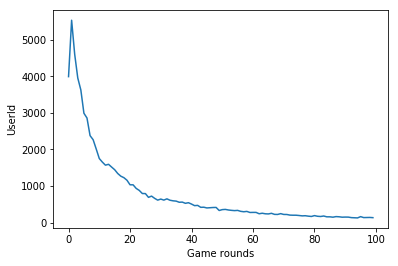

In [194]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x='sum_gamerounds',y='userid')
ax.set_xlabel("Game rounds")
ax.set_ylabel("UserId")

In [196]:
# The % of users that came back the day after they installed
df['retention_1'].mean()*100

44.52095044850259

In [198]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].mean()*100

version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64

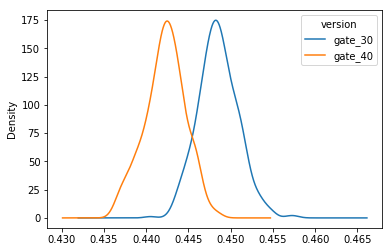

In [200]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
iterations = 500
for i in range(iterations):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot.density()

Text(0.5,0,'% difference between the two AB-groups')

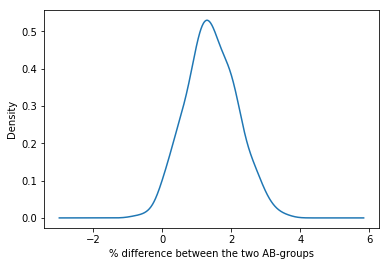

In [202]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40'])/boot_1d['gate_40']*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot.density()
ax.set_xlabel('% difference between the two AB-groups')

In [204]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
#prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])
prob = (boot_1d['diff'] > 0).mean()
# Pretty printing the probability
'{:.2f}'.format(prob)

'0.98'

In [212]:
# Calculating 7-day retention for both AB-groups
df.groupby('version')['retention_7'].mean()*100

version
gate_30    19.020134
gate_40    18.200004
Name: retention_7, dtype: float64

'1.00'

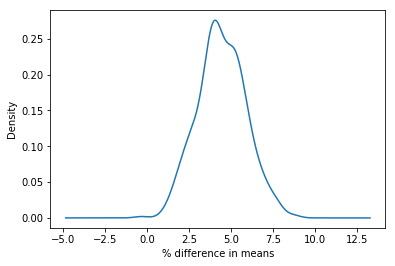

In [213]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)
# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40'])/boot_7d['gate_40']*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot.density()
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).mean()

# Pretty printing the probability
'{:.2f}'.format(prob)

In [210]:
# So, given the data and the bootstrap analysis
# Should we move the gate from level 30 to level 40 ?
move_to_level_40 = False # True or False ?